##  Twitter Sentiment Analysis

###  What we need for doing sentiment analysis?

     
     1.) Library - Which library are we going to use? There are many ways to do sentiment analysis like
           -'NLTK', 'TEXTBLOB', 'Logistic Regression', 'VaderSentiment', 'Naive Bayes algo', 'SGD(Stochastic Gradient                    Descent)' etc.., 
           
     2.) Data(Training) for Algorithms - Pre classifeid data based on positive words, negative words from a huge text.
     
         a.) Downlaod data from link - http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
         
         b.) Text preprocess - Training data
         
         c.) Split data - Training and Testing
         
     3.) Fit Model & Predict - Basically we are fitting the model with train data and predict using test data for accuracy.
     
     4.) Data(Real) Sentiment analysis - Extract anyone of the types direct data like 'string' typed by you,text file,              csv file or social media streaming (Twitter, Facebook, Reddit etc..,) or web scrapping (Web pages)
          
         a.) Extract data - Here data is extracted from 'Twitter'
         
         b.) Text preprocessing (We are not performing all the listed below but these are steps taken care using some                    functions)
         
            - Unstructured data to structured data
            - Removing special characters, symbols
            - Removing stop words
            - BOW (Bag of words) / Tokenization
            - Upper case to Lower case conversion
            - Stemming/ Lemmatization
            - NER ( Named Entity Recognition)
            - Covert 'Word to vector'
            
     5.) Perform Sentiment Analysis - using algorithms

### 1. Library ---> Import library

In [25]:
from tweepy import OAuthHandler, API ## For data extraction from twitter
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
import collections
import numpy as np
import tweepy

### 2. Data(Training) for Algorithms - Pre classifeid data based on positive words, negative words from a huge text.

### a.) Download data 

In [26]:
### Download the data using link -http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
## Save it in your local machine and extract
## We need to train the model with known data 
## The known data says whether the sentence is positive or negative
## finally model can predict for unseen data
dat = load_files('C:/Users/MACBOOK PRO/Desktop/Datascience/b20190403/review_polarity/txt_sentoken')
X = dat.data
y = dat.target
len(X)

2000

In [27]:
len(y)

2000

###         b.) Text preprocess - Training data


In [28]:
## Create corpus
corpus = []
for i in range(0,2000):
    clean_text = re.sub(r'\W', ' ', str(X[i]))
    clean_text = re.sub(r'^br$', ' ', clean_text)
    clean_text = re.sub(r'\s+^br$\s+', ' ', clean_text)
    clean_text = re.sub(r'\s+[a-z]\s+', ' ', clean_text)
    clean_text = re.sub(r'^b\s+', ' ', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text) 
    clean_text = clean_text.lower()    
    corpus.append(clean_text)    

In [29]:
## Either you can use (countvectorizer and TFIDFTransfromer) together or directly use TFIDFVectorizer

In [30]:
## *******************Note --> this is completely optional step for understanding*************************

#CountVectorizer -- Convert a collection of text documents to matrix of token counts
countvector    = CountVectorizer(stop_words= stopwords.words('english')) 
tfidftransform = TfidfTransformer()

X = countvector.fit_transform(corpus).toarray() 

X = tfidftransform.fit_transform(X).toarray()

#print(countvector.get_feature_names())

In [31]:
# using TfidfVectorizer directly 

tfidfvector   = TfidfVectorizer(max_features=1082, min_df=3, max_df=0.6, stop_words=stopwords.words('english')) ## TFIDF word vectorizer

X = tfidfvector.fit_transform(corpus).toarray()

###          c.) Split data - Training and Testing


In [32]:
## split the data to train and test
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X,y, test_size=0.2, random_state = 0)

##      3.) Fit Model & Predict - Basically we are fitting the model with train data and predict using test data for accuracy.


In [33]:
## Classify the reviews as positive, negative using Logistic REGRESSION

LR  = LogisticRegression() ## Logistic Regression
LR.fit(X_train_text,y_train_text)

y_pred = LR.predict(X_test_text)

### Check accuracy of logistic regression
print("Logistic Regression accuracy : ",accuracy_score(y_pred,y_test_text))

Logistic Regression accuracy :  0.84


C:\Users\MACBOOK PRO\AppData\Local\conda\conda\envs\Data science\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
## Classify the reviews as positive, negative using SGD(Stochastic Gradient Descent)

SGD = SGDClassifier(class_weight={0:0.67935513, 0:1.89388265}, random_state= 0)
SGD.fit(X_train_text,y_train_text)
y_pred_SGD = SGD.predict(X_test_text) 

### Check accuracy of logistic regression
print("Stochastic Gradient descent accuracy: ", accuracy_score(y_pred_SGD,y_test_text))

Stochastic Gradient descent accuracy:  0.82


C:\Users\MACBOOK PRO\AppData\Local\conda\conda\envs\Data science\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


##     4.) Data(Real) Sentiment analysis - Extract anyone of the types direct data like 'string' typed by you,text file,            csv file or social media streaming (Twitter, Facebook, Reddit etc..,) or web scrapping (Web pages)


###        a.) Extract data - Here data is extracted from 'Twitter'


In [35]:
## twitter credentials- create using the link( https://developer.twitter.com/ )
access_token    = 'replace your access token created from twitter' # Create your credential in twitter developer
access_secret   = 'replace your access secret created from twitter' # Create your credential in twitter developer
consumer_key    = 'replace your consumer key created from twitter' # Create your credential in twitter developer
consumer_secret = 'replace your consumer secret created from twitter' # Create your credential in twitter developer

## initiate consumer authorization
auth = OAuthHandler(consumer_key, consumer_secret)

## initiate access token
auth.set_access_token(access_token, access_secret)

## initiate api
api = API(auth)

In [36]:
## Query and extract twitter messages

query = 'elon musk'
tweet_msg = []

for msg in tweepy.Cursor(api.search, q = query+'-filter:retweets',lang='en' ,result_type='recent').items(2000):
    tweet_msg.append(msg.text)

## Lets see the number of messages extracted from twitter
len(tweet_msg)

2000

###       b.) Text preprocessing Real data (Twitter)


In [37]:
cleaned_tweet = []
for text in tweet_msg:
        tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text)
        tweet = re.sub(r'@\s*', ' ', tweet)
        tweet = tweet.lower()
        tweet = re.sub(r'\W', ' ', tweet)
        tweet = re.sub(r'\d', ' ', tweet)           
        cleaned_tweet.append(tweet)

##      5.) Perform Sentiment Analysis - using algorithms

In [38]:
tweet_vector = tfidfvector.fit_transform(cleaned_tweet) # Convert real data words to vector

### a.) Using Logistic Regression

In [39]:
LR_tweet_pred = LR.predict(tweet_vector)  ## Predict using Logistic Regression

## need to know how many 0's(Positve) and 1's(Negative)
LR_pos_neg_result = collections.Counter(LR_tweet_pred)
print("No.of positive reviews : ", LR_pos_neg_result[0])
print("No.of Negative reviews : ", LR_pos_neg_result[1])

No.of positive reviews :  883
No.of Negative reviews :  1117


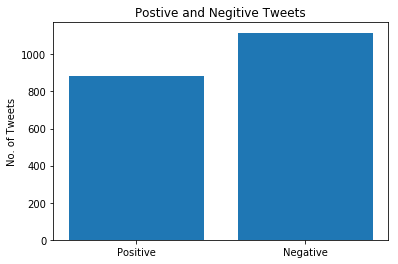

In [40]:
### Visualization of Logistic regression
obj = ['Positive', 'Negative']
y_pos = np.arange(len(obj))
plt.bar(y_pos,[LR_pos_neg_result[0], LR_pos_neg_result[1]])
plt.xticks(y_pos,obj)
plt.ylabel('No. of Tweets')
plt.title('Postive and Negitive Tweets')
plt.show()

### b.) Using Stochastic Gradient Descent

In [41]:
SGD_tweet_pred = SGD.predict(tweet_vector)

## need to know how many 0's(Positve) and 1's(Negative)
SGD_pos_neg_result = collections.Counter(SGD_tweet_pred)
print("No.of positive reviews : ", SGD_pos_neg_result[0])
print("No.of Negative reviews : ", SGD_pos_neg_result[1])

No.of positive reviews :  847
No.of Negative reviews :  1153


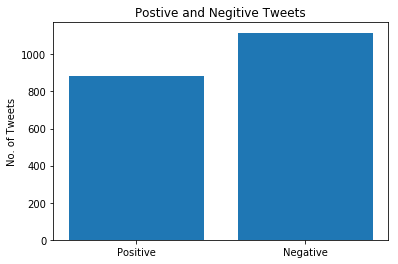

In [42]:
### Visualization of Stochastic Gradient Descent
obj = ['Positive', 'Negative']
y_pos = np.arange(len(obj))
plt.bar(y_pos,[LR_pos_neg_result[0], LR_pos_neg_result[1]])
plt.xticks(y_pos,obj)
plt.ylabel('No. of Tweets')
plt.title('Postive and Negitive Tweets')
plt.show()